# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [306]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

import pandas as pd
import json
import yaml

import numpy as np

In [307]:
data_jan = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv')
data_jan  # 2021 january dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-01-11 11:00:00,2,RAY,KABATAŞ-MAHMUTBEY,2,AKTARMA,541,545
1,2021-01-18 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,1834,1867
2,2021-01-01 17:00:00,1,KARAYOLU,İETT,2,NORMAL,7406,7868
3,2021-01-18 20:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,7064,7199
4,2021-01-22 05:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,712,713
...,...,...,...,...,...,...,...,...
22122,2021-01-19 21:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1445,1447
22123,2021-01-15 22:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,122,123
22124,2021-01-08 15:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,3641,3720
22125,2021-01-08 10:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,7380,7857


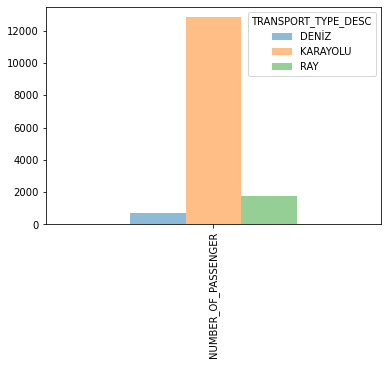

In [308]:
df_pivot = pd.pivot_table(data_jan, values="NUMBER_OF_PASSENGER",columns="TRANSPORT_TYPE_DESC")
ax = df_pivot.plot(kind="bar",alpha=0.5)
plt.show()

In [309]:
data_may = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv")
data_may # 2021 may dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-05-01 14:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,88,88
1,2021-05-03 16:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,5311,5356
2,2021-05-01 06:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,129,129
3,2021-05-03 12:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2574,2641
4,2021-05-03 07:00:00,2.0,RAY,TAKSİM-4.LEVENT,2,AKTARMA,1038,1038
...,...,...,...,...,...,...,...,...
1785,2021-05-02 15:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,134,134
1786,2021-05-03 09:00:00,2.0,RAY,İETT TÜNEL,2,AKTARMA,29,29
1787,2021-05-02 09:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,109,111
1788,2021-05-02 23:00:00,2.0,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,2,2


# date sort function and changing in dataframe

In [310]:
def dateSort(data_month):
    return data_month.sort_values(by=["DATE_TIME"],inplace=True)
dateSort(data_jan)
dateSort(data_may)

# function for null check, sort value by column

In [311]:
def  Nanvalues(data_mon):
    mon_null = data_mon.isnull().sum()
    return mon_null


In [312]:
def sort_value(data_month,name):
    return data_month.sort_values(name,ascending=False)



# creating data frame for total passengers of different transportation types

In [313]:
data_jan_transport_sum = data_jan.groupby(["TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum() # january 2021
df_1 = pd.DataFrame(data_jan_transport_sum)
df_1["Percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1




,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER,Percent
0,DENİZ,1763773,2.372241
1,KARAYOLU,44635332,60.033680
2,RAY,27951380,37.594079


In [314]:
data_jan_transport_sum = data_jan.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
df_1 = pd.DataFrame(data_jan_transport_sum)
df_1




,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER
0,2021-01-01 00:00:00,KARAYOLU,583
1,2021-01-01 00:00:00,RAY,247
2,2021-01-01 01:00:00,DENİZ,1
3,2021-01-01 01:00:00,KARAYOLU,182
4,2021-01-01 01:00:00,RAY,8
...,...,...,...
2205,2021-01-31 22:00:00,KARAYOLU,3798
2206,2021-01-31 22:00:00,RAY,4354
2207,2021-01-31 23:00:00,DENİZ,29
2208,2021-01-31 23:00:00,KARAYOLU,1573


In [315]:
data_may_transport_sum = data_may.groupby(["TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum() # may 2021
df_1 = pd.DataFrame(data_may_transport_sum)
df_1["percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1


,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER,percent
0,DENİZ,47448,1.793874
1,KARAYOLU,1823757,68.951063
2,RAY,773797,29.255063


In [316]:
data_may_transport_sum = data_may.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
df_1.set_index(['NUMBER_OF_PASSENGER']) 
df_1 = pd.DataFrame(data_may_transport_sum)
df_1

,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER
0,2021-05-01 00:00:00,DENİZ,4
1,2021-05-01 00:00:00,KARAYOLU,814
2,2021-05-01 00:00:00,RAY,44
3,2021-05-01 01:00:00,DENİZ,1
4,2021-05-01 01:00:00,KARAYOLU,231
...,...,...,...
211,2021-05-03 22:00:00,KARAYOLU,9612
212,2021-05-03 22:00:00,RAY,599
213,2021-05-03 23:00:00,DENİZ,31
214,2021-05-03 23:00:00,KARAYOLU,3522


In [317]:
data_jun = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv")
data_jun  # 2020 june dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-06-07 08:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,1829,1925
1,2020-06-07 22:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2669,3110
2,2020-06-23 05:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,14,14
3,2020-06-28 11:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,51,51
4,2020-06-26 18:00:00,2,RAY,MARMARAY,2,NORMAL,19160,19794
...,...,...,...,...,...,...,...,...
19829,2020-06-24 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,62,63
19830,2020-06-22 08:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,138,138
19831,2020-06-12 10:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,3430,3529
19832,2020-06-29 12:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,103,106


In [318]:
data_sep = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv")
data_sep # 2020 september dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910
1,2020-09-16 09:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,12,15
2,2020-09-15 12:00:00,2,RAY,KADIKÖY-MODA,2,NORMAL,84,88
3,2020-09-06 13:00:00,1,KARAYOLU,ÖHO,2,NORMAL,60045,69100
4,2020-09-26 13:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,3348,3379
...,...,...,...,...,...,...,...,...
22184,2020-09-28 12:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,1146,1147
22185,2020-09-29 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,17,17
22186,2020-09-08 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,130,131
22187,2020-09-20 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,22,22


In [319]:
dateSort(data_sep)
dateSort(data_jun)  


In [320]:
def groupTransfertypes(data_month):
    data_month_transport_sum = data_month.groupby(["DATE_TIME","TRANSFER_TYPE"],as_index=False)["NUMBER_OF_PASSENGER"].sum() # january 2021
    return  pd.DataFrame(data_month_transport_sum)

In [321]:
groupTransfertypes(data_jun)

,DATE_TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,2020-06-01 00:00:00,NORMAL,1025
1,2020-06-01 01:00:00,NORMAL,306
2,2020-06-01 02:00:00,NORMAL,145
3,2020-06-01 03:00:00,NORMAL,97
4,2020-06-01 04:00:00,NORMAL,334
...,...,...,...
1351,2020-06-30 21:00:00,NORMAL,97971
1352,2020-06-30 22:00:00,AKTARMA,11819
1353,2020-06-30 22:00:00,NORMAL,70535
1354,2020-06-30 23:00:00,AKTARMA,5696


In [322]:
groupTransfertypes(data_sep)

,DATE_TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,2020-09-01 00:00:00,AKTARMA,566
1,2020-09-01 00:00:00,NORMAL,7198
2,2020-09-01 01:00:00,AKTARMA,9
3,2020-09-01 01:00:00,NORMAL,1906
4,2020-09-01 02:00:00,NORMAL,960
...,...,...,...
1373,2020-09-30 21:00:00,NORMAL,104426
1374,2020-09-30 22:00:00,AKTARMA,10946
1375,2020-09-30 22:00:00,NORMAL,82908
1376,2020-09-30 23:00:00,AKTARMA,5777


<AxesSubplot:>

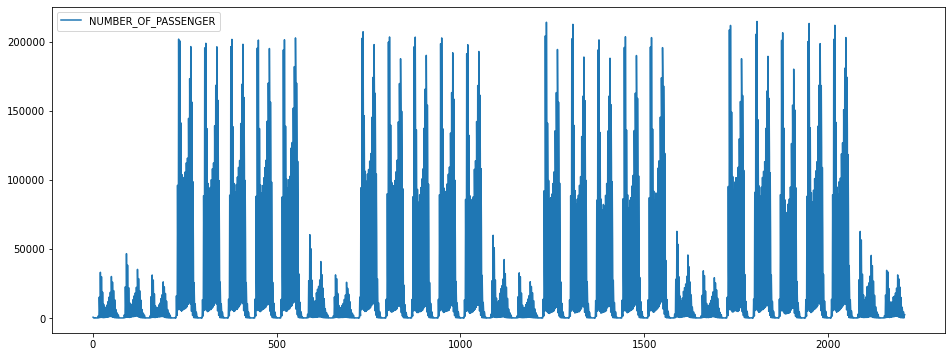

In [323]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data_jan_transport_sum)

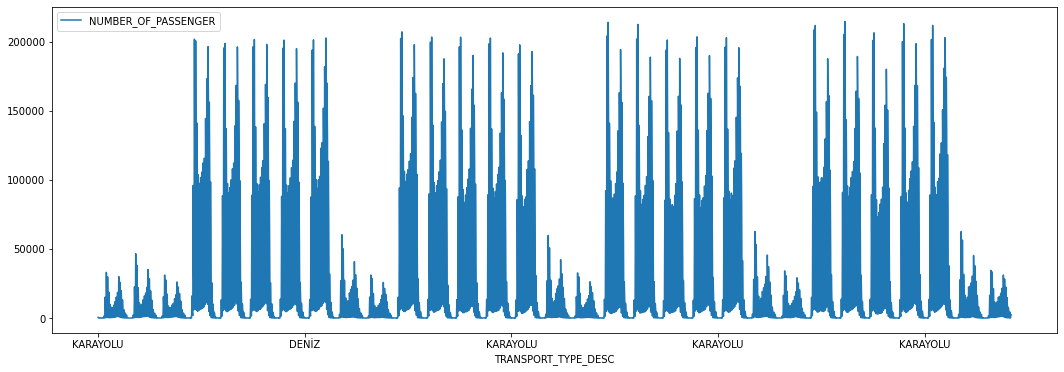

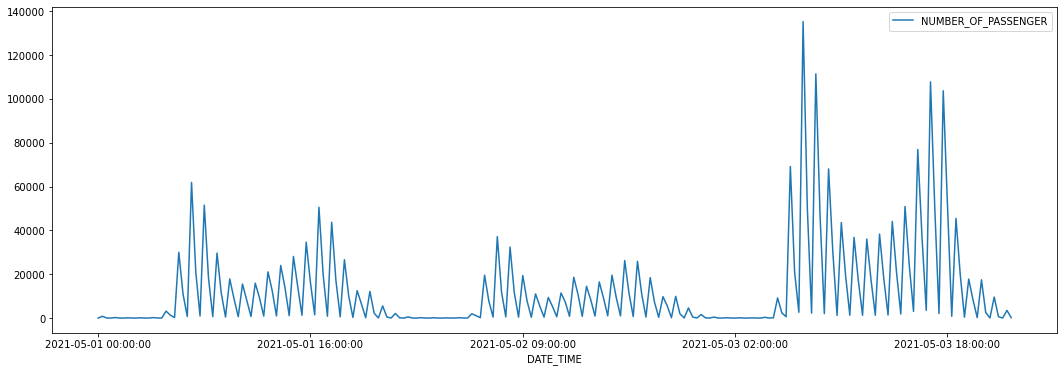

In [324]:
from sqlalchemy import column


data_jan_transport_sum.plot(x = "TRANSPORT_TYPE_DESC", y = "NUMBER_OF_PASSENGER" , figsize=(18,6))
plt.show()
data_may_transport_sum.plot(x="DATE_TIME", y = ["NUMBER_OF_PASSENGER"],figsize=(18,6))
plt.show()



# Q4-Q5
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?

In [325]:
data_apr = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv')
data_apr

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-04-10 16:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,667,704
1,2020-04-16 12:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,145,147
2,2020-04-17 14:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,816,831
3,2020-04-16 00:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,5,5
4,2020-04-28 12:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1452,1543
...,...,...,...,...,...,...,...,...
15509,2020-04-17 08:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,546,554
15510,2020-04-06 23:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,5,5
15511,2020-04-28 01:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,3,3
15512,2020-04-28 13:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,839,878


In [326]:
dateSort(data_apr)
data_apr

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
12675,2020-04-01 00:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,6,6
5889,2020-04-01 00:00:00,2,RAY,EDİRNEKAPI-SULTANÇİFTLİĞİ,2,AKTARMA,6,6
11544,2020-04-01 00:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,27,29
3114,2020-04-01 00:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,5,5
8752,2020-04-01 00:00:00,2,RAY,EDİRNEKAPI-SULTANÇİFTLİĞİ,2,NORMAL,62,63
...,...,...,...,...,...,...,...,...
1653,2020-04-30 23:00:00,1,KARAYOLU,METROBÜS,2,NORMAL,1734,1866
13500,2020-04-30 23:00:00,2,RAY,MARMARAY,2,AKTARMA,7,7
12686,2020-04-30 23:00:00,1,KARAYOLU,İETT,2,AKTARMA,70,70
14176,2020-04-30 23:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,1,1


In [327]:
data_apr1 = data_apr.groupby(["DATE_TIME","LINE"],as_index=False)["NUMBER_OF_PASSENGER"].sum()    # first step of dataframe for our target columns
df_apr = pd.DataFrame(data_apr1)
df_apr

,DATE_TIME,LINE,NUMBER_OF_PASSENGER
0,2020-04-01 00:00:00,AKSARAY-HAVALİMANI,84
1,2020-04-01 00:00:00,EDİRNEKAPI-SULTANÇİFTLİĞİ,68
2,2020-04-01 00:00:00,KABATAŞ-BAĞCILAR,40
3,2020-04-01 00:00:00,KADIKÖY-KARTAL METROSU,24
4,2020-04-01 00:00:00,KİRAZLI-OLİMPİYATKÖY,9
...,...,...,...
9083,2020-04-30 23:00:00,MOTOR TEKNE,9
9084,2020-04-30 23:00:00,ÖHO,2070
9085,2020-04-30 23:00:00,ÜSKÜDAR ÇEKMEKÖY METROSU,6
9086,2020-04-30 23:00:00,İETT,448


# seperating time and date from DATE_TIME column

In [328]:
from datetime import datetime

df_apr["TIME"] = pd.to_datetime(df_apr["DATE_TIME"]).dt.time
df_apr["DATE"] = pd.to_datetime(df_apr["DATE_TIME"]).dt.date
df_apr

,DATE_TIME,LINE,NUMBER_OF_PASSENGER,TIME,DATE
0,2020-04-01 00:00:00,AKSARAY-HAVALİMANI,84,00:00:00,2020-04-01
1,2020-04-01 00:00:00,EDİRNEKAPI-SULTANÇİFTLİĞİ,68,00:00:00,2020-04-01
2,2020-04-01 00:00:00,KABATAŞ-BAĞCILAR,40,00:00:00,2020-04-01
3,2020-04-01 00:00:00,KADIKÖY-KARTAL METROSU,24,00:00:00,2020-04-01
4,2020-04-01 00:00:00,KİRAZLI-OLİMPİYATKÖY,9,00:00:00,2020-04-01
...,...,...,...,...,...
9083,2020-04-30 23:00:00,MOTOR TEKNE,9,23:00:00,2020-04-30
9084,2020-04-30 23:00:00,ÖHO,2070,23:00:00,2020-04-30
9085,2020-04-30 23:00:00,ÜSKÜDAR ÇEKMEKÖY METROSU,6,23:00:00,2020-04-30
9086,2020-04-30 23:00:00,İETT,448,23:00:00,2020-04-30


In [329]:
#df_apr = pd.DataFrame({'DATE':pd.date_range(start='2020-04-01',end='2020-04-02')})
#df_apr.DATE.dt.month




In [339]:
df_apr["DATE"] = pd.to_datetime(df_apr['DATE'])
df_apr['DAY'] = df_apr['DATE'].dt.strftime('%d')
#df_apr = df_apr.reindex(columns=["DATE_TIME","LINE","TIME","DATE","DAY","NUMBER_OF_PASSENGER"])
df_apr


,DATE_TIME,LINE,NUMBER_OF_PASSENGER,TIME,DATE,DAY
0,2020-04-01 00:00:00,AKSARAY-HAVALİMANI,84,00:00:00,2020-04-01,01
1,2020-04-01 00:00:00,EDİRNEKAPI-SULTANÇİFTLİĞİ,68,00:00:00,2020-04-01,01
2,2020-04-01 00:00:00,KABATAŞ-BAĞCILAR,40,00:00:00,2020-04-01,01
3,2020-04-01 00:00:00,KADIKÖY-KARTAL METROSU,24,00:00:00,2020-04-01,01
4,2020-04-01 00:00:00,KİRAZLI-OLİMPİYATKÖY,9,00:00:00,2020-04-01,01
...,...,...,...,...,...,...
9083,2020-04-30 23:00:00,MOTOR TEKNE,9,23:00:00,2020-04-30,30
9084,2020-04-30 23:00:00,ÖHO,2070,23:00:00,2020-04-30,30
9085,2020-04-30 23:00:00,ÜSKÜDAR ÇEKMEKÖY METROSU,6,23:00:00,2020-04-30,30
9086,2020-04-30 23:00:00,İETT,448,23:00:00,2020-04-30,30


In [340]:
data_apr1 = df_apr.groupby(["DAY","LINE"],as_index=False)["NUMBER_OF_PASSENGER"].sum().sort_values("NUMBER_OF_PASSENGER",ascending=False)
data_apr1


,DAY,LINE,NUMBER_OF_PASSENGER
416,27,ÖHO,421725
461,30,ÖHO,414726
343,22,ÖHO,411023
313,20,ÖHO,400725
446,29,ÖHO,393924
...,...,...,...
191,12,TELEFERİK MAÇKA - TAŞKIŞLA,1
115,07,TELEFERİK EYÜP PİYERLOTİ,1
358,23,TELEFERİK MAÇKA - TAŞKIŞLA,1
269,17,TELEFERİK EYÜP PİYERLOTİ,1


## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?